# Diagnostics and Analysis With PyVisOS for OSIRIS Data

This notebook provides basic data analysis techniques for OSIRIS simulations. We will load the simulation output, inspect available data, visualize fields and particles, and perform some basic analysis. If you'd like to use or see the dataset that was used throughout this notebook, you can find the input file [here](https://github.com/leahghartman/osirisutils/blob/main/decks/base-wake-2d).

In this notebook, I'll be using [PyVisOS](https://github.com/UCLA-Plasma-Simulation-Group/pyVisOS), a collection of lightweight utilities for manipulating HDF5 files.

## 1. Setup and Imports

In [1]:
%matplotlib inline

# Important packages
import os
import numpy as np
import matplotlib.pyplot as plt

# PyVisOS
import osh5io
import osh5def
import osh5vis
import osh5utils

## 2. Path Definition and Data Loading

We can specify the directory containing the OSIRIS ouput files and load them using ```osh5io.read_h5()```. 

In [3]:
# Define data directory
data_dir = "/scratch/agrt_root/agrt98/lghart/osresults/os4.0_2D_test_21165964%.nyx.engin.umich.edu/MS/"

# Read the file
data = osh5io.read_h5(data_dir + './DENSITY/plasma/charge/charge-plasma-000008.h5')

The documentation for PyVisOS states that, because H5Data (which is ...) is a subclass of of numpy ndarray, it _should_ support all functions that take ndarray as input. 

### 3.1 Plotting

osh5vis controls all of the data visualization tools in PyVisOS. The ```osh5vis.osplot()``` function is used to generate plots from the provided data. It should automatically format the axes and a colorbar with a colormap of your choosing.

(<matplotlib.image.AxesImage at 0x147c2e878e10>,
 <matplotlib.colorbar.Colorbar at 0x147c2e6ac050>)

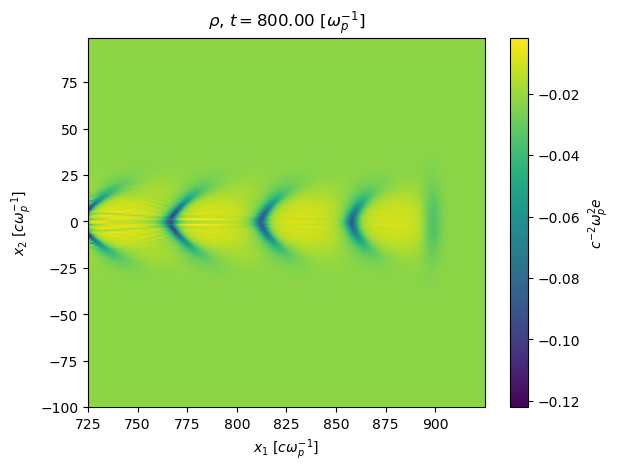

In [7]:
osh5vis.osplot(data)

### 3.2 Axes Operations

The idea of this package was to just make data manipulation easy. So, if you want to switch the axes of the image, you can transpose the data, then PyVisOS will automatically switch the axes for you. 

(<matplotlib.image.AxesImage at 0x147c2e6f1e50>,
 <matplotlib.colorbar.Colorbar at 0x147c2e725090>)

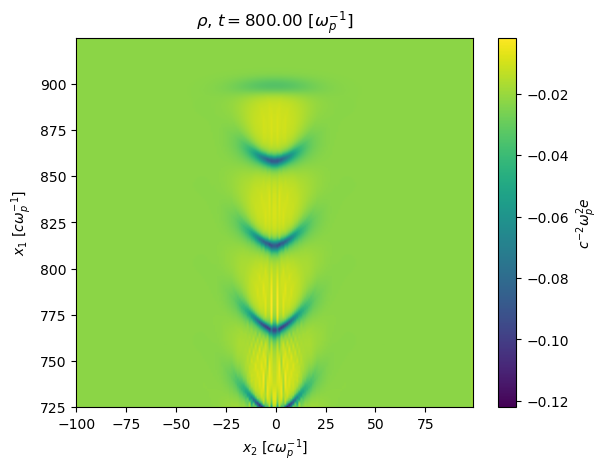

In [8]:
osh5vis.osplot(data.T)

This same idea goes for other kinds of data manipulations as well, like plotting the FFT. 

/tmp/ipykernel_2813636/2864875236.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  osh5vis.osplot(np.absolute(fourier))


(<matplotlib.image.AxesImage at 0x147c2c646710>,
 <matplotlib.colorbar.Colorbar at 0x147c2c5c2e90>)

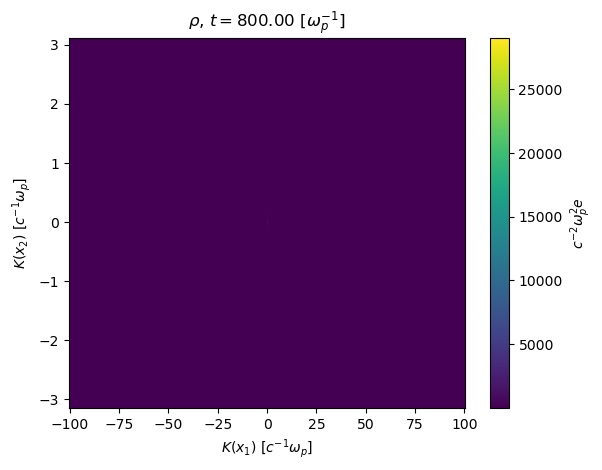

In [15]:
fourier = osh5utils.fft2(data)
osh5vis.osplot(np.absolute(fourier))

## 4. Advanced Functionality

### 4.1 Widgets

Output()

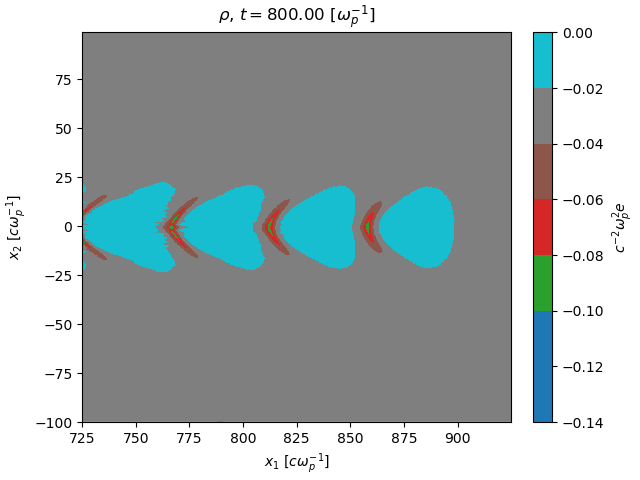

In [14]:
osh5visipy.oscontourf_w(data, cmap='tab10')

### 4.2 Data Slicing

In [21]:
# Here are the two axes. Don't worry about the details because you will get them when reading from the real simulation data
x = osh5def.DataAxis(10, 15, 5, attrs={'NAME':'x1', 'LONG_NAME':'x_1', 'UNITS':'c / \omega_p'})
y = osh5def.DataAxis(0, 1, 6, attrs={'NAME':'t', 'LONG_NAME':'time', 'UNITS':'1 / \omega_p'})

data_attrs = {'UNITS': osh5def.OSUnits('m_e c \omega_p / e'), 'NAME': 'e1', 'LONG_NAME': 'E_1'}
run_attrs = {'NOTE': 'parameters about this simulation are stored here', 'TIME UNITS': '1/\omega_p',
            'XMAX':np.array([1., 15.]), 'XMIN':np.array([0., 10.])}

# h is the 3D data used for illustration
z = osh5def.DataAxis(0, 1, 7, attrs={'NAME':'p1', 'LONG_NAME':'p_1', 'UNITS':'m_e c'})
h = osh5def.H5Data(np.arange(210.).reshape(7, 6, 5), data_attrs=data_attrs, run_attrs=run_attrs, axes=[z, y, x])

# ===
# The following examples mimic the numpy tutorial for array indexing but here we only concern about the axes
# ===

print('---------------------------- EXAMPLE 1 ---------------------------------')
# x and y axes are not changed
print('the z axis of h is', h.axes[0][:])
print('the z axis of h[1:7:2, :, :] is', h[1:7:2, :, :].axes[0][:])

print('\n---------------------------- EXAMPLE 2 ---------------------------------')
print('the z axis of h[-2:7, :, :] is', h[-2:7, :, :].axes[0][:])

print('\n---------------------------- EXAMPLE 3 ---------------------------------')
# not sure why but you do reverse the order of axes (and data)
print('the z axis of h[-1:3:-1,:,:] is', h[-1:3:-1,:,:].axes[0][:])

print('\n---------------------------- EXAMPLE 4 ---------------------------------')
print('the z axis of h[5:, :, :] is', h[5:, :, :].axes[0][:])

print('\n---------------------------- EXAMPLE 5 ---------------------------------')
# Note that y axis is not there any more
print('the axes of h[:, 2] are')
[print(ax) for ax in h[:,2].axes]

print('\n---------------------------- EXAMPLE 6 ---------------------------------')
# usage of the ellipsis. also note that we can keep the degenerate axis with the same trick as in numpy
print('the axes of h[..., 2:3] are')
[print(ax) for ax in h[..., 2:3].axes]

print('\n---------------------------- EXAMPLE 7 ---------------------------------')
# not sure why but you can add a dummy axis and increase the dimensionality of the data
print('the dimension of h[:,np.newaxis,:,:] is', h[:,np.newaxis,:,:].shape, ', and the axes are')
[print(ax) for ax in h[:,np.newaxis,:,:].axes]

# ---------------
# from now on we demonstrate the advance indexing, in which case the return is an ndarray
print('\n------------------------- advanced indexing -----------------------------')
print('---------------------------- EXAMPLE 8 ---------------------------------')
print('result of h[h<15] is ', type(h[h<15]))
print(h[h<15])


print('\n---------------------------- EXAMPLE 9 ---------------------------------')
print('result of h[[0, 1, 2], [0, 1, 0]] is ', type(h[[0, 1, 2], [0, 1, 0]]))
print(h[[0, 1, 2], [0, 1, 0]])

print('\n---------------------------- EXAMPLE 10 ---------------------------------')
# Although the actrual data is the same as h[1:2, 1:2], the following result in an ndarray instead of H5Data
print('result of h[1:2, [1, 2]] is ', type(h[1:2, [1, 2]]))
print(h[1:2, [1, 2]])

print('\n---------------------------- EXAMPLE 11 ---------------------------------')
# The return of advance indexing is the *actual* data itself, not a copy. Changing it will change the original data
h[:6, [1, 2, 4, 5]] = 0
print('After setting h[:6, [1, 2, 4, 5]] to 0, print the content of h:\n', h.view(np.ndarray))

---------------------------- EXAMPLE 1 ---------------------------------
the z axis of h is [0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286]
the z axis of h[1:7:2, :, :] is [0.14285714 0.42857143 0.71428571]

---------------------------- EXAMPLE 2 ---------------------------------
the z axis of h[-2:7, :, :] is [0.71428571 0.85714286]

---------------------------- EXAMPLE 3 ---------------------------------
the z axis of h[-1:3:-1,:,:] is [0.85714286 0.71428571 0.57142857]

---------------------------- EXAMPLE 4 ---------------------------------
the z axis of h[5:, :, :] is [0.71428571 0.85714286]

---------------------------- EXAMPLE 5 ---------------------------------
the axes of h[:, 2] are
p1: [0.0, 1.0] m_e c 
x1: [10.0, 15.0] c \omega_p^{-1} 

---------------------------- EXAMPLE 6 ---------------------------------
the axes of h[..., 2:3] are
p1: [0.0, 1.0] m_e c 
t: [0.0, 0.9999999999999999] \omega_p^{-1} 
x1: [12.0, 12.0] c \omega_p^{-1} 

-------

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2813636/3614181272.py:2: SyntaxWarning: invalid escape sequence '\o'
  x = osh5def.DataAxis(10, 15, 5, attrs={'NAME':'x1', 'LONG_NAME':'x_1', 'UNITS':'c / \omega_p'})
/tmp/ipykernel_2813636/3614181272.py:3: SyntaxWarning: invalid escape sequence '\o'
  y = osh5def.DataAxis(0, 1, 6, attrs={'NAME':'t', 'LONG_NAME':'time', 'UNITS':'1 / \omega_p'})
/tmp/ipykernel_2813636/3614181272.py:5: SyntaxWarning: invalid escape sequence '\o'
  data_attrs = {'UNITS': osh5def.OSUnits('m_e c \omega_p / e'), 'NAME': 'e1', 'LONG_NAME': 'E_1'}
/tmp/ipykernel_2813636/3614181272.py:6: SyntaxWarning: i